# Import the data set

In [17]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.stats import norm
from scipy import stats
from sklearn import datasets, linear_model

HousesSold = pd.read_csv('train.csv')
print(HousesSold['SalePrice'].describe())

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


The data set is imported. The mean is higher than median implying that SalePrice is right skewed. We need to see how may variables are there in this data set.

In [3]:
print(HousesSold.shape)
print(HousesSold.columns)

(1460, 81)
Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 

There are 81 variables in total in this data set and a total of 1460 observations

 # *SalePrice*

C:\Users\Amjad Ali\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


Skewness: 1.882876
Kurtosis: 6.536282


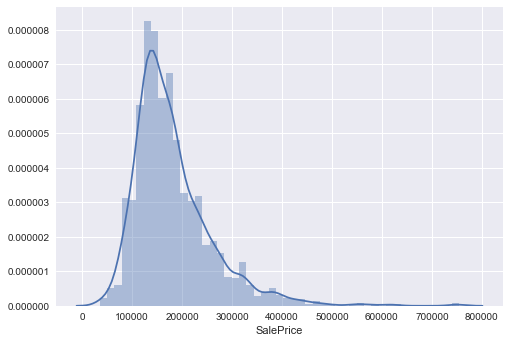

In [4]:
f1=plt.figure()
sb.distplot(HousesSold['SalePrice'])
print("Skewness: %f" % HousesSold['SalePrice'].skew())
print("Kurtosis: %f" % HousesSold['SalePrice'].kurt())
plt.show()

# Heat Map

Variables that are strongly correlated with SalePrice variable can be spotted from the heat map of their correlations with each other.

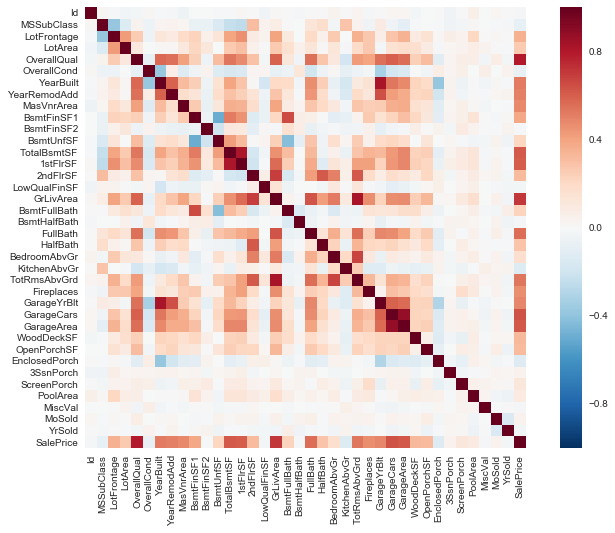

In [5]:
corrmat = HousesSold.corr()
f2=plt.subplots(1, figsize=(12, 9))

# Draw the heatmap using seaborn
sb.heatmap(corrmat, vmax=1.0, square=True)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.subplots_adjust(bottom=0.2)
plt.show()

# Better Correlations with the *SalePrice Variable*

We should spot the variables that have stronger correlations with the *SalePrice*.

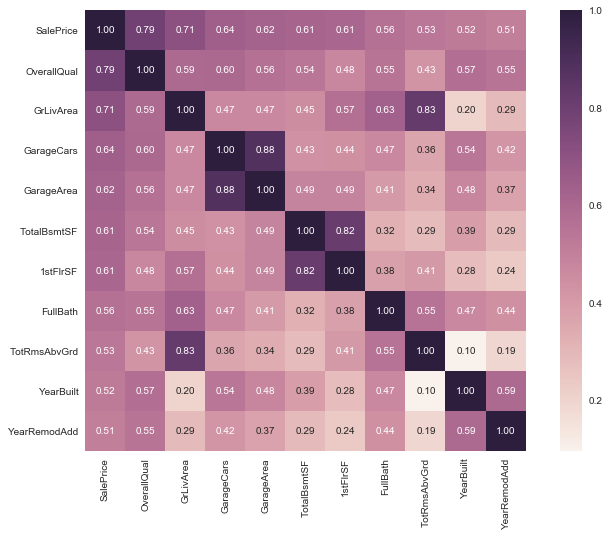

In [6]:
k = 11
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(HousesSold[cols].values.T)
f3=plt.subplots(1, figsize=(12, 9))
sb.set(font_scale=1)
sb.heatmap(cm, cbar=True, annot = True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.subplots_adjust(bottom=0.2)
plt.show()

# *SalePrice*

Thus, we observe that the variable *SalePrice* has considerable relationship (r > 0.5) with the following variables:

 1. *OverallQual*
 2. *GrLivArea*
 3. *GarageCars*
 4. *GarageArea*
 5. *TotalBsmtSF*
 6. *1stFlrSF*
 7.  *FullBath*
 8. *TotRmsAbvGrd*
 9. *YearBuilt*
 10. *YearRemodAdd*

A further investigation reveals that the variables *GrLivArea* and *TotRmsAbvGrd* are strongly correlated with each other, and that absolutely makes sense. We can, therefore, happily drop one of these variables. Let's keep *GrLivArea* and drop *TotRmsAbvGrd*.

Similarly *GarageCars* and *GarageArea* are redundant, we can drop *GarageArea*. We will also keep *TotalBsmtSF* and drop *1stFlrSF*.

We would like to keep other variables as they are strong candidates of being the predictors of *SalePrice* variable. The new list of variables that we would like to use as the predictors of *SalePrice* are:

 1. *OverallQual*
 2. *GrLivArea*
 3. *GarageCars*
 4. *TotalBsmtSF*
 5.  *FullBath*
 6. *YearBuilt*
 7. *YearRemodAdd*

# Scatterplots of strong candidates with the *SalePrice*

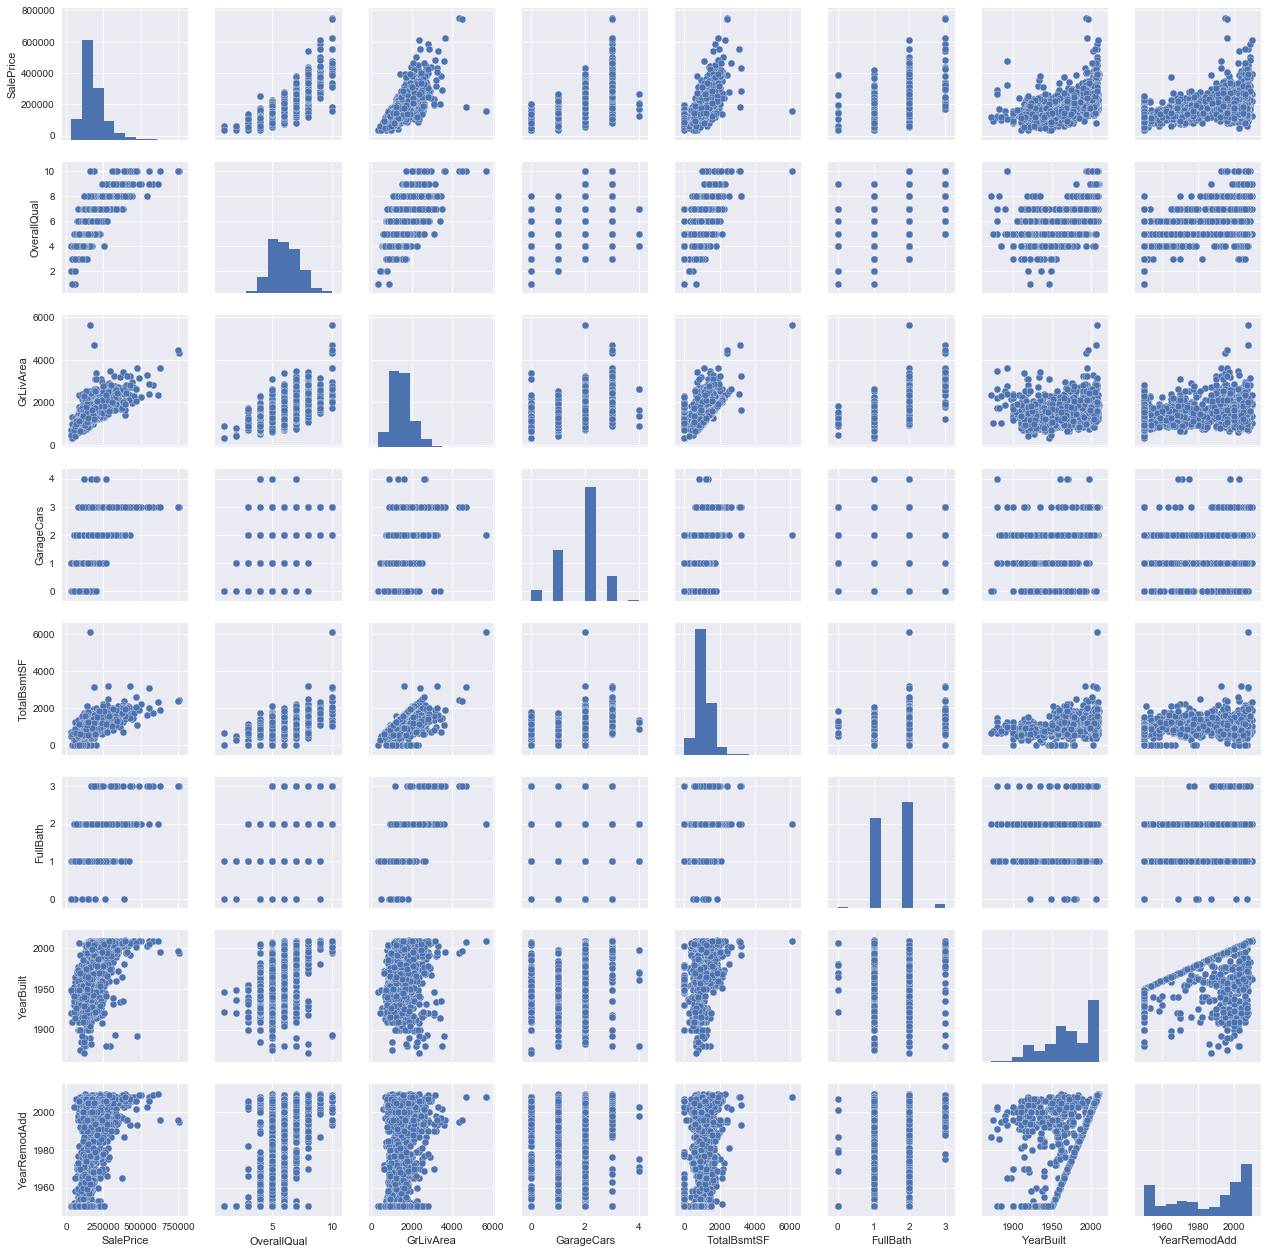

In [7]:
sb.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt', 'YearRemodAdd']
f4=sb.pairplot(HousesSold[cols], size = 2.2)
plt.show()

A quick observation says that the response variable *SalePrice* is right skewed. The two response variables *GrLivArea* and * TotalBsmtSF* are left skewed, the other three variables *OverallQual*, *GarageCars*, and *FullBath* seem normal. The variable *YearBuilt* is left skewed, whereas *YearRemodAdd* is bimodal.

The scatter plots also show a quick overview of the behaviour of the response variable with the explanatory variables. All these relations are positive (week - moderately strong) and linear/non-linear.

# Missing values

It is important that we remove the variables with the significant number of missing values.

In [8]:
#missing data
allMissing = HousesSold.isnull().sum().sort_values(ascending=False)
percentage = (HousesSold.isnull().sum()/HousesSold.isnull().count()).sort_values(ascending=False)
missingData = pd.concat([allMissing, percentage*100], axis=1, keys=['TotalMissing', 'Percentage'])
missingData.head(20)

,TotalMissing,Percentage
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageCond,81,5.547945
GarageType,81,5.547945
GarageYrBlt,81,5.547945
GarageFinish,81,5.547945


A barplot of the variables with missing values is helpful here. We are okay to drop all these variables except *Electrical* because none of these variables seems to have a serious impact on the response variable. We can drop the observation in the data set *HousesSold* that has missing observation in *Electrical* variable.

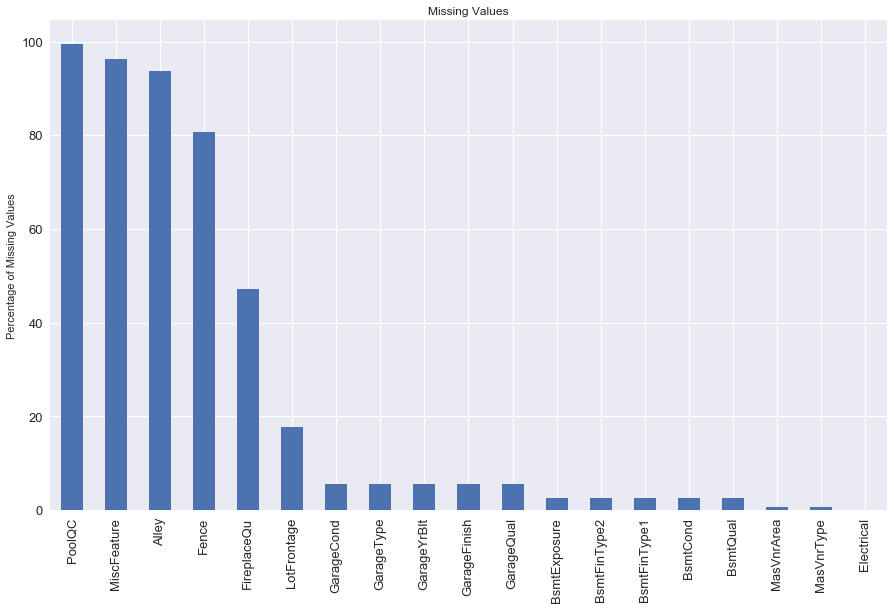

In [9]:
missingData.head(19)[['Percentage']].plot(kind='bar', title ="Missing Values", figsize=(15, 10), legend=False, fontsize=13)
f5=plt.subplots_adjust(bottom=0.2)
plt.ylabel("Percentage of Missing Values")
plt.show()

In [10]:
HousesSold1 = HousesSold.drop((missingData[missingData['TotalMissing'] > 1]).index,1)
HousesSold2 = HousesSold1.drop(HousesSold1.loc[HousesSold1['Electrical'].isnull()].index)
print(HousesSold2.shape)

(1459, 63)


# Transformations

## *SalePrice*

We will apply logarithmic transformation on this variable.

C:\Users\Amjad Ali\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


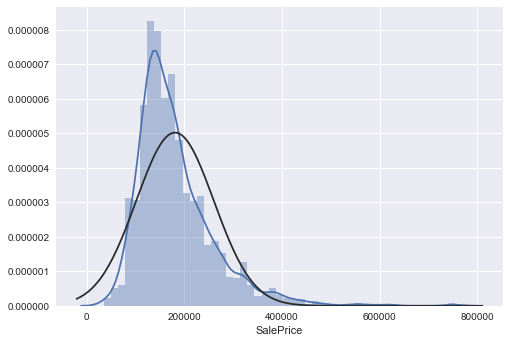

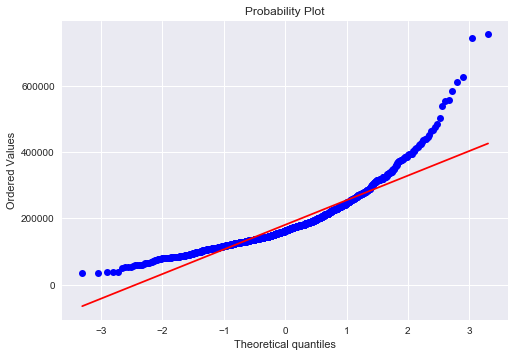

In [11]:
#histogram and normal probability plot
f6=sb.distplot(HousesSold2['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(HousesSold2['SalePrice'], plot=plt)
plt.show()

As agreed before this is a right skewed distribution. The logarithmic distribution might help...

In [12]:
HousesSold2['SalePrice'] = np.log(HousesSold2['SalePrice']);

C:\Users\Amjad Ali\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


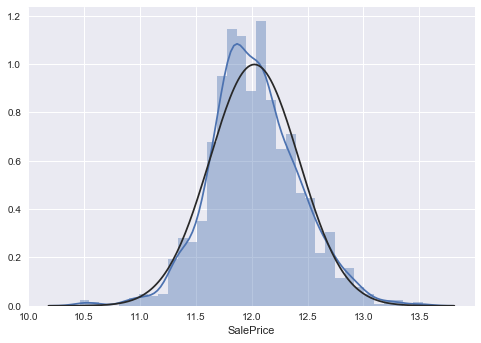

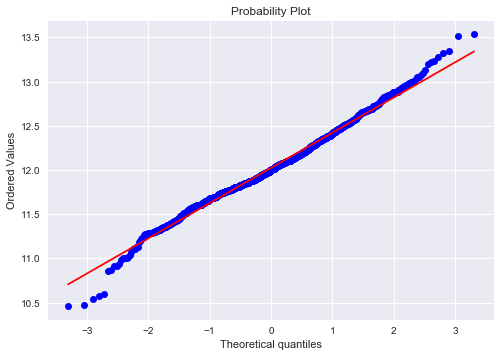

In [13]:
sb.distplot(HousesSold2['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(HousesSold2['SalePrice'], plot=plt)
plt.show()

This looks better.

## *GrLivArea*

C:\Users\Amjad Ali\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


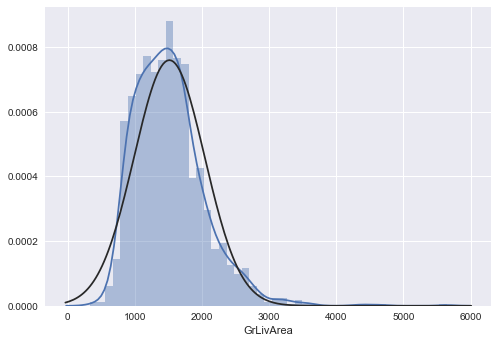

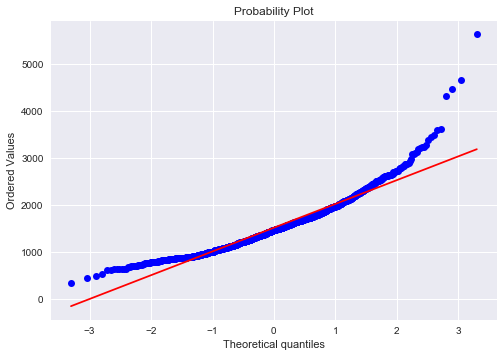

In [14]:
#histogram and normal probability plot
sb.distplot(HousesSold2['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(HousesSold2['GrLivArea'], plot=plt)
plt.show()

We can delete the two extreme values on the right hand side here. Then using log transformation...

In [15]:
HousesSold2.sort_values(by = 'GrLivArea', ascending = False)[:2]

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,63887,Pave,IR3,Bnk,AllPub,Corner,Gtl,...,0,0,0,480,0,1,2008,New,Partial,11.982929
523,524,60,RL,40094,Pave,IR1,Bnk,AllPub,Inside,Gtl,...,0,0,0,0,0,10,2007,New,Partial,12.126759


In [16]:
HousesSold2 = HousesSold2.drop(HousesSold2[HousesSold2['Id'] == 1299].index)
HousesSold2 = HousesSold2.drop(HousesSold2[HousesSold2['Id'] == 524].index)
HousesSold2['GrLivArea'] = np.log(HousesSold2['GrLivArea'])

C:\Users\Amjad Ali\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


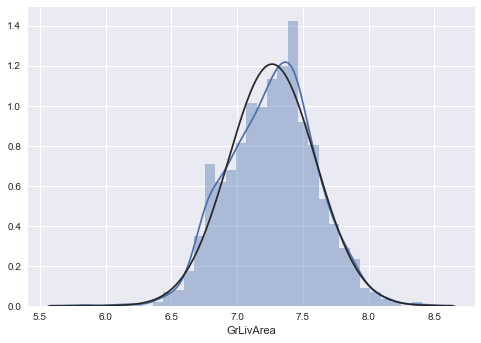

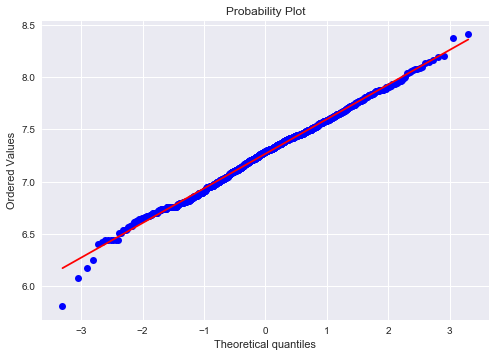

In [17]:
sb.distplot(HousesSold2['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(HousesSold2['GrLivArea'], plot=plt)
plt.show()

Its also good...

## *TotalBsmtSF*

C:\Users\Amjad Ali\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


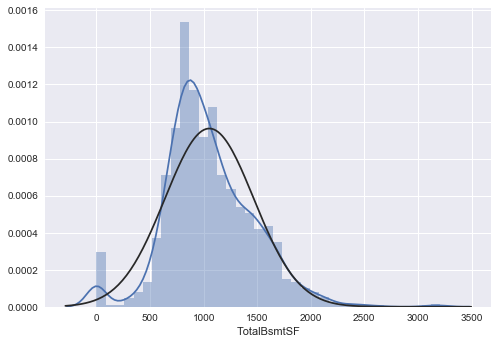

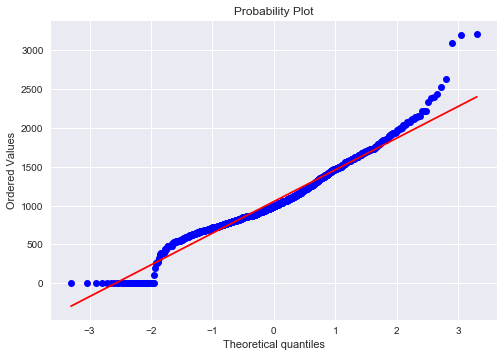

In [18]:
#histogram and normal probability plot
sb.distplot(HousesSold2['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(HousesSold2['TotalBsmtSF'], plot=plt)
plt.show()

We see a slight problem here.... Some observations with zero basement area. We do not want to remove this. For the moment let's not transform this.

## Other variables

We will for the time being keep the other variables as they are and try to look at their relationships with the response variable.

# Relationships with the *SalePrice*
## *OverallQual*

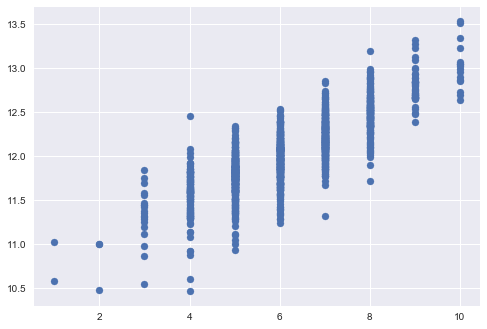

In [19]:
plt.scatter(HousesSold2['OverallQual'], HousesSold2['SalePrice']);
plt.show()

or

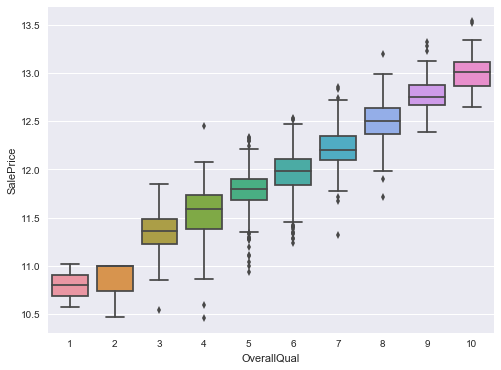

In [20]:
f, ax = plt.subplots(figsize=(8, 6))
fig = sb.boxplot(x="OverallQual", y="SalePrice", data=HousesSold2)
plt.show()

That seems nice and linear relationship.

## *GrLivArea*

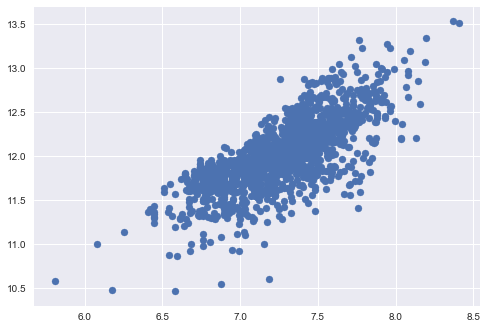

In [21]:
plt.scatter(HousesSold2['GrLivArea'], HousesSold2['SalePrice']);
plt.show()

this is also good.

## *GarageCars*

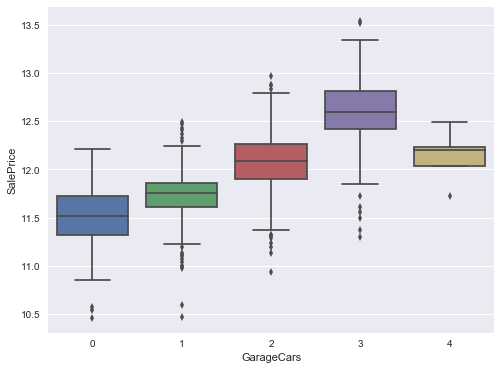

In [22]:
f, ax = plt.subplots(figsize=(8, 6))
fig = sb.boxplot(x="GarageCars", y="SalePrice", data=HousesSold2)
plt.show()

or

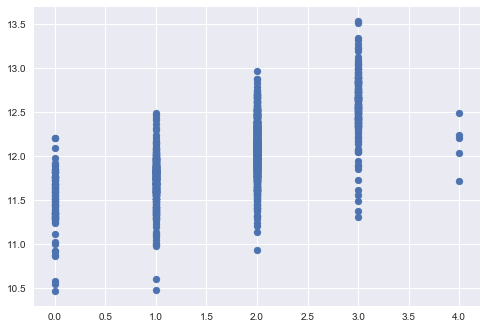

In [23]:
plt.scatter(HousesSold2['GarageCars'], HousesSold2['SalePrice']);
plt.show()

The variable *SalePrice* is related with the *GarageCars* linearly. The drop in house price for a garage of 4 cars space could be for any reason but these are just a few entries which makes this category less significant anyway.

## *TotalBsmtSF*

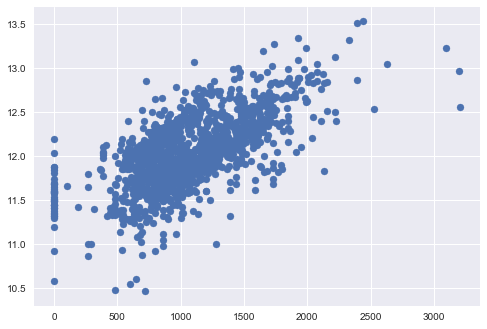

In [24]:
plt.scatter(HousesSold2['TotalBsmtSF'], HousesSold2['SalePrice']);
plt.show()

This looks okay (except for the zeros basement entries). We can, however, remove two outliers with large basement area...

In [25]:
HousesSold2.sort_values(by = 'TotalBsmtSF', ascending = False)[:2]

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
332,333,20,RL,10655,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,10,2009,WD,Normal,12.55673
496,497,20,RL,12692,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,291,0,0,0,0,5,2007,WD,Normal,12.97154


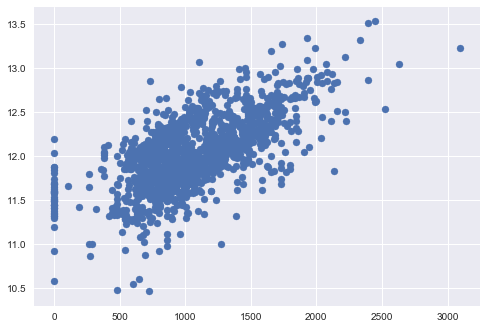

In [26]:
HousesSold2 = HousesSold2.drop(HousesSold2[HousesSold2['Id'] == 333].index)
HousesSold2 = HousesSold2.drop(HousesSold2[HousesSold2['Id'] == 497].index)
plt.scatter(HousesSold2['TotalBsmtSF'], HousesSold2['SalePrice']);
plt.show()

## *FullBath*

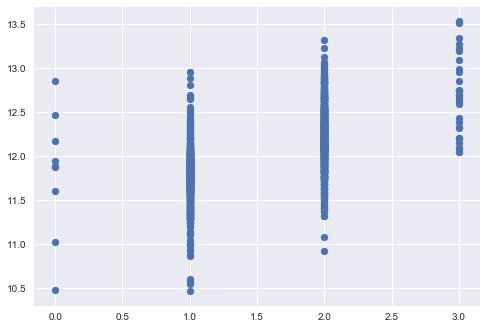

In [27]:
plt.scatter(HousesSold2['FullBath'], HousesSold2['SalePrice']);
plt.show()

or

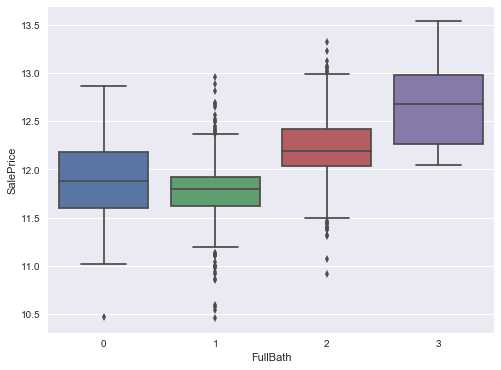

In [28]:
f, ax = plt.subplots(figsize=(8, 6))
fig = sb.boxplot(x="FullBath", y="SalePrice", data=HousesSold2)
plt.show()

Again, there are only a few entries with zero number of full baths, therefore, it is okay that its average position does not lie on the line of relationship.

## *YearBuilt*

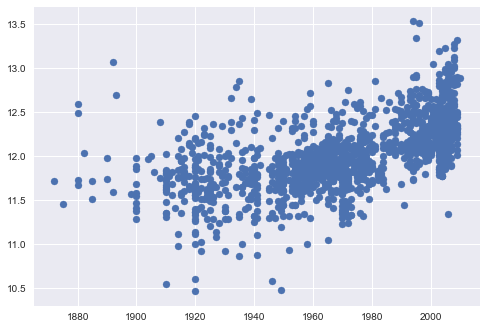

In [29]:
plt.scatter(HousesSold2['YearBuilt'], HousesSold2['SalePrice']);
plt.show()

I will count this as a nonlinear or quadratic relationship with the *SalePrice* variable. Some really old houses are being sold on decent prices probably for their historic nature.

## *YearRemodAdd*

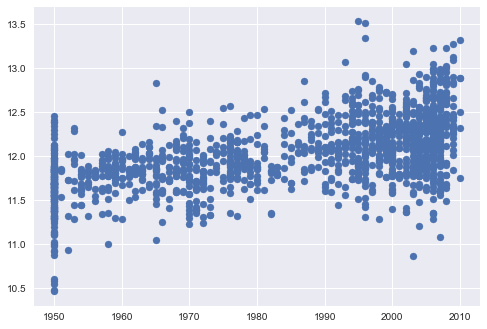

In [30]:
plt.scatter(HousesSold2['YearRemodAdd'], HousesSold2['SalePrice']);
plt.show()

Probably a linear relationship?

## *TotRmsAbvGrd*

C:\Users\Amjad Ali\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


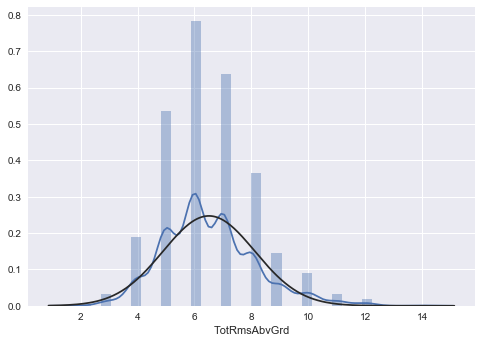

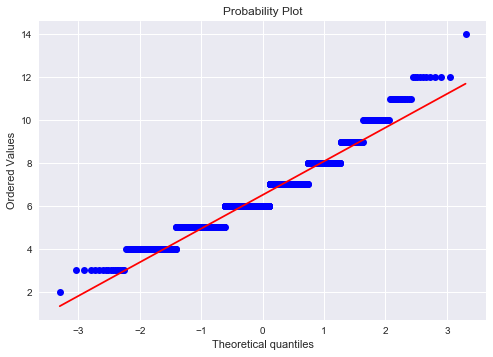

In [31]:
#histogram and normal probability plot
sb.distplot(HousesSold2['TotRmsAbvGrd'], fit=norm);
fig = plt.figure()
res = stats.probplot(HousesSold2['TotRmsAbvGrd'], plot=plt)
plt.show()

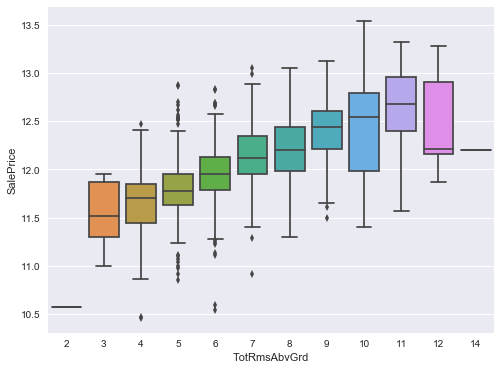

In [32]:
f, ax = plt.subplots(figsize=(8, 6))
fig = sb.boxplot(x="TotRmsAbvGrd", y="SalePrice", data=HousesSold2)
plt.show()

## *GarageArea*

C:\Users\Amjad Ali\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


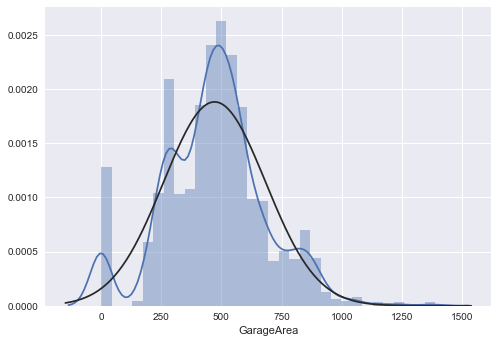

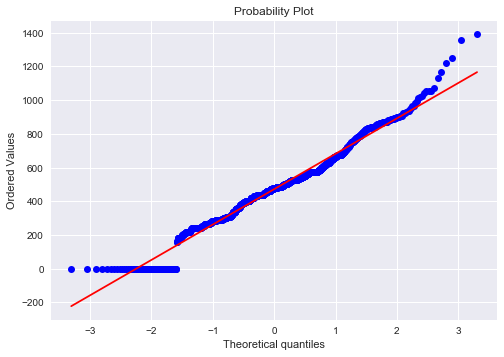

In [33]:
#histogram and normal probability plot
sb.distplot(HousesSold2['GarageArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(HousesSold2['GarageArea'], plot=plt)
plt.show()

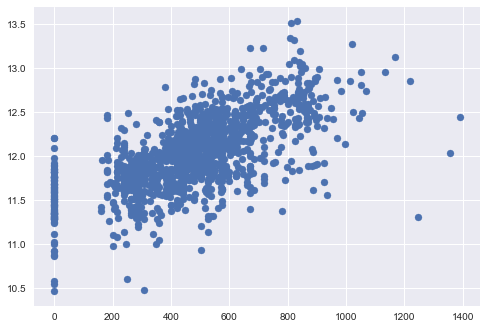

In [34]:
plt.scatter(HousesSold2['GarageArea'], HousesSold2['SalePrice']);
plt.show()

## *1stFlrSF*

C:\Users\Amjad Ali\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


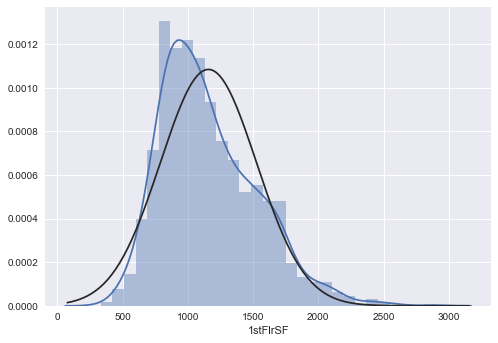

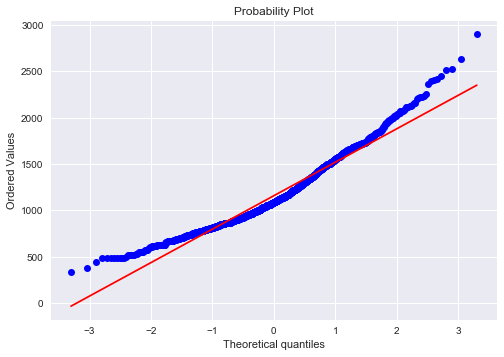

In [35]:
#histogram and normal probability plot
sb.distplot(HousesSold2['1stFlrSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(HousesSold2['1stFlrSF'], plot=plt)
plt.show()

In [36]:
HousesSold2['1stFlrSF'] = np.log(HousesSold2['1stFlrSF'])

C:\Users\Amjad Ali\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


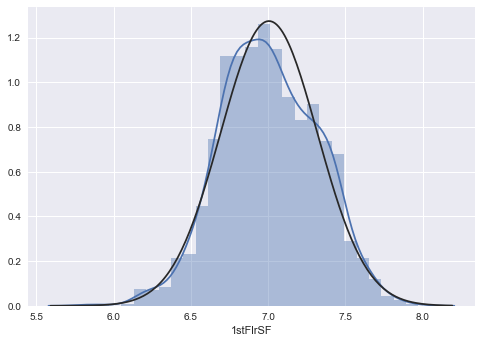

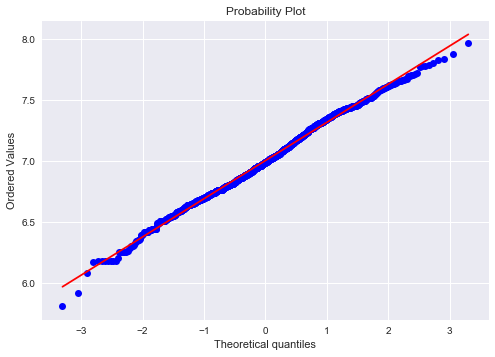

In [37]:
sb.distplot(HousesSold2['1stFlrSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(HousesSold2['1stFlrSF'], plot=plt)
plt.show()

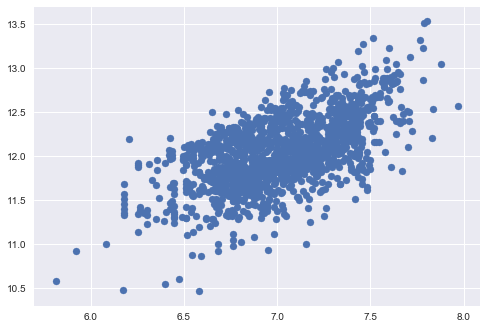

In [38]:
plt.scatter(HousesSold2['1stFlrSF'], HousesSold2['SalePrice']);
plt.show()

# Qualitative Variables
## *MSSubClass*

MSSubClass
20     11.976659
30     11.511925
40     11.864870
45     11.585073
50     11.790550
60     12.283034
70     11.957591
75     12.004564
80     12.016726
85     11.854474
90     11.820263
120    12.165251
160    11.891362
180    11.390359
190    11.761720
Name: SalePrice, dtype: float64
[11.390358680367315, 11.511924964636645, 11.585073030068475, 11.761719663462213, 11.790550027504185, 11.82026308426412, 11.854473887323451, 11.864870103516152, 11.891361900690473, 11.957590740115915, 11.976659481202368, 12.004563593297618, 12.016726473799254, 12.165250651009918, 12.283033686666302]


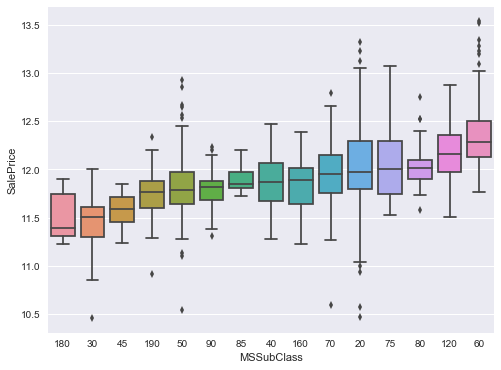

In [39]:
m = HousesSold2.groupby('MSSubClass')['SalePrice'].apply(np.median);

print(m)
print(sorted(m))
ordr = [180, 30, 45, 190, 50, 90, 85, 40, 160, 70, 20, 75, 80, 120, 60]
f, ax = plt.subplots(figsize=(8, 6))
fig = sb.boxplot(x="MSSubClass", y="SalePrice", order=ordr, data=HousesSold2)
plt.show()

In [40]:
MSSubClassNum = np.zeros(HousesSold2['MSSubClass'].shape)

for row in range(len(HousesSold2['MSSubClass'])):
    if int(HousesSold2['MSSubClass'].iloc[row]) == 180:
        MSSubClassNum[row] = 0.0;
    elif int(HousesSold2['MSSubClass'].iloc[row]) == 30:
        MSSubClassNum[row] = 1.0;
    elif int(HousesSold2['MSSubClass'].iloc[row]) == 45:
        MSSubClassNum[row] = 2.0;
    elif int(HousesSold2['MSSubClass'].iloc[row]) == 190:
        MSSubClassNum[row] = 3.0;
    elif int(HousesSold2['MSSubClass'].iloc[row]) == 50:
        MSSubClassNum[row] = 4.0;
    elif int(HousesSold2['MSSubClass'].iloc[row]) == 90:
        MSSubClassNum[row] = 5.0;
    elif int(HousesSold2['MSSubClass'].iloc[row]) == 85:
        MSSubClassNum[row] = 6.0;
    elif int(HousesSold2['MSSubClass'].iloc[row]) == 40:
        MSSubClassNum[row] = 7.0;
    elif int(HousesSold2['MSSubClass'].iloc[row]) == 160:
        MSSubClassNum[row] = 8.0;
    elif int(HousesSold2['MSSubClass'].iloc[row]) == 70:
        MSSubClassNum[row] = 9.0;
    elif int(HousesSold2['MSSubClass'].iloc[row]) == 20:
        MSSubClassNum[row] = 10.0;
    elif int(HousesSold2['MSSubClass'].iloc[row]) == 75:
        MSSubClassNum[row] = 11.0;
    elif int(HousesSold2['MSSubClass'].iloc[row]) == 80:
        MSSubClassNum[row] = 12.0;
    elif int(HousesSold2['MSSubClass'].iloc[row]) == 120:
        MSSubClassNum[row] = 13.0;
    elif int(HousesSold2['MSSubClass'].iloc[row]) == 60:
        MSSubClassNum[row] = 14.0;
print(MSSubClassNum)
HousesSold2['MSSubClassNum'] = MSSubClassNum;

[ 14.  10.  14. ...,   9.  10.  10.]


## *Neighborhood*

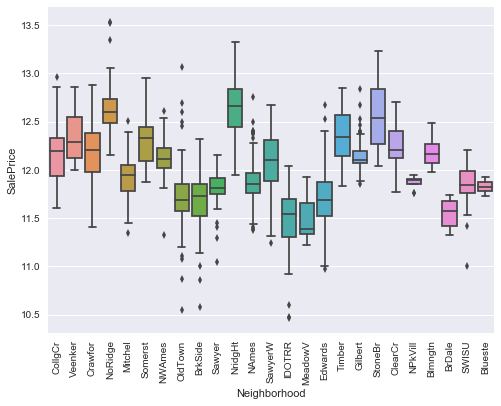

In [41]:
f, ax = plt.subplots(figsize=(8, 6))
fig = sb.boxplot(x="Neighborhood", y="SalePrice", data=HousesSold2)
plt.xticks(rotation=90)
plt.show()

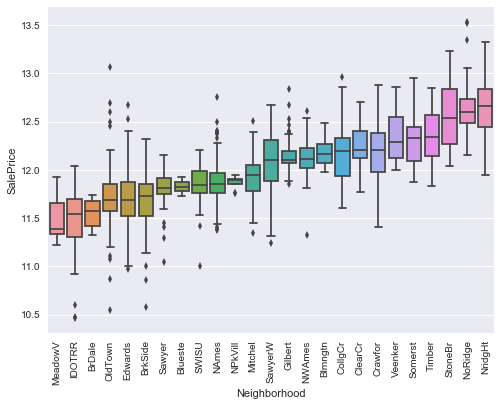

In [42]:
m = HousesSold2.groupby('Neighborhood')['SalePrice'].apply(np.median);

#print(m)
#print(sorted(m))
ordr = ['MeadowV', 'IDOTRR', 'BrDale', 'OldTown', 'Edwards', 'BrkSide', 'Sawyer', 'Blueste',\
       'SWISU', 'NAmes', 'NPkVill', 'Mitchel', 'SawyerW', 'Gilbert', 'NWAmes', 'Blmngtn', 'CollgCr',\
       'ClearCr', 'Crawfor', 'Veenker', 'Somerst', 'Timber', 'StoneBr', 'NoRidge', 'NridgHt'];
f, ax = plt.subplots(figsize=(8, 6))
fig = sb.boxplot(x="Neighborhood", y="SalePrice", order=ordr, data=HousesSold2)
plt.xticks(rotation=90)
plt.show()

In [43]:
NeighborhoodNum = np.zeros(HousesSold2['Neighborhood'].shape)

for row in range(len(HousesSold2['Neighborhood'])):
    if HousesSold2['Neighborhood'].iloc[row] == 'MeadowV':
        NeighborhoodNum[row] = 0.0;
    elif HousesSold2['Neighborhood'].iloc[row] == 'IDOTRR':
        NeighborhoodNum[row] = 1.0;
    elif HousesSold2['Neighborhood'].iloc[row] == 'BrDale':
        NeighborhoodNum[row] = 2.0;
    elif HousesSold2['Neighborhood'].iloc[row] == 'OldTown':
        NeighborhoodNum[row] = 3.0;
    elif HousesSold2['Neighborhood'].iloc[row] == 'Edwards':
        NeighborhoodNum[row] = 4.0;
    elif HousesSold2['Neighborhood'].iloc[row] == 'BrkSide':
        NeighborhoodNum[row] = 5.0;
    elif HousesSold2['Neighborhood'].iloc[row] == 'Sawyer':
        NeighborhoodNum[row] = 6.0;
    elif HousesSold2['Neighborhood'].iloc[row] == 'Blueste':
        NeighborhoodNum[row] = 7.0;
    elif HousesSold2['Neighborhood'].iloc[row] == 'SWISU':
        NeighborhoodNum[row] = 8.0;
    elif HousesSold2['Neighborhood'].iloc[row] == 'NAmes':
        NeighborhoodNum[row] = 9.0;
    elif HousesSold2['Neighborhood'].iloc[row] == 'NPkVill':
        NeighborhoodNum[row] = 10.0;
    elif HousesSold2['Neighborhood'].iloc[row] == 'Mitchel':
        NeighborhoodNum[row] = 11.0;
    elif HousesSold2['Neighborhood'].iloc[row] == 'SawyerW':
        NeighborhoodNum[row] = 12.0;
    elif HousesSold2['Neighborhood'].iloc[row] == 'Gilbert':
        NeighborhoodNum[row] = 13.0;
    elif HousesSold2['Neighborhood'].iloc[row] == 'NWAmes':
        NeighborhoodNum[row] = 14.0;
    elif HousesSold2['Neighborhood'].iloc[row] == 'Blmngtn':
        NeighborhoodNum[row] = 15.0;
    elif HousesSold2['Neighborhood'].iloc[row] == 'CollgCr':
        NeighborhoodNum[row] = 16.0;
    elif HousesSold2['Neighborhood'].iloc[row] == 'ClearCr':
        NeighborhoodNum[row] = 17.0;
    elif HousesSold2['Neighborhood'].iloc[row] == 'Crawfor':
        NeighborhoodNum[row] = 18.0;
    elif HousesSold2['Neighborhood'].iloc[row] == 'Veenker':
        NeighborhoodNum[row] = 19.0;
    elif HousesSold2['Neighborhood'].iloc[row] == 'Somerst':
        NeighborhoodNum[row] = 20.0;
    elif HousesSold2['Neighborhood'].iloc[row] == 'Timber':
        NeighborhoodNum[row] = 21.0;
    elif HousesSold2['Neighborhood'].iloc[row] == 'StoneBr':
        NeighborhoodNum[row] = 21.0;
    elif HousesSold2['Neighborhood'].iloc[row] == 'NoRidge':
        NeighborhoodNum[row] = 22.0;
    elif HousesSold2['Neighborhood'].iloc[row] == 'NridgHt':
        NeighborhoodNum[row] = 23.0;
HousesSold2['NeighborhoodNum'] = NeighborhoodNum;

##  *Condition1*

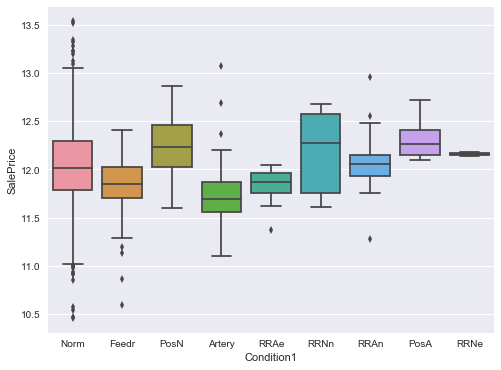

In [44]:
f, ax = plt.subplots(figsize=(8, 6))
fig = sb.boxplot(x="Condition1", y="SalePrice", data=HousesSold2)
plt.show()

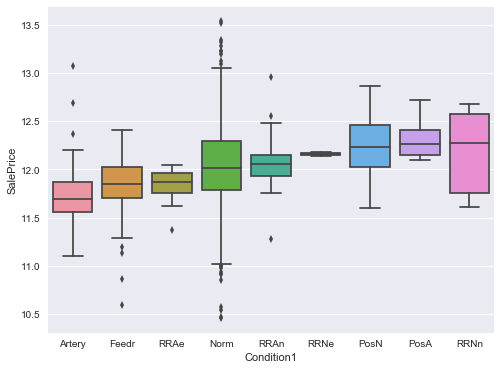

In [45]:
m = HousesSold2.groupby('Condition1')['SalePrice'].apply(np.median);

#print(m)
#print(sorted(m))

ordr = ['Artery', 'Feedr', 'RRAe', 'Norm', 'RRAn', 'RRNe', 'PosN', 'PosA', "RRNn"];
f, ax = plt.subplots(figsize=(8, 6))
fig = sb.boxplot(x="Condition1", y="SalePrice", order=ordr, data=HousesSold2)
plt.show()

In [46]:
Condition1Num = np.zeros(HousesSold2['Condition1'].shape)

for row in range(len(HousesSold2['Condition1'])):
    if HousesSold2['Condition1'].iloc[row] == 'Artery':
        Condition1Num[row] = 0.0;
    elif HousesSold2['Condition1'].iloc[row] == 'Feedr':
        Condition1Num[row] = 1.0;
    elif HousesSold2['Condition1'].iloc[row] == 'RRAe':
        Condition1Num[row] = 2.0;
    elif HousesSold2['Condition1'].iloc[row] == 'Norm':
        Condition1Num[row] = 3.0;
    elif HousesSold2['Condition1'].iloc[row] == 'RRAn':
        Condition1Num[row] = 4.0;
    elif HousesSold2['Condition1'].iloc[row] == 'RRNe':
        Condition1Num[row] = 5.0;
    elif HousesSold2['Condition1'].iloc[row] == 'PosN':
        Condition1Num[row] = 6.0;
    elif HousesSold2['Condition1'].iloc[row] == 'PosA':
        Condition1Num[row] = 7.0;
    elif HousesSold2['Condition1'].iloc[row] == 'RRNn':
        Condition1Num[row] = 8.0;
HousesSold2['Condition1Num'] = Condition1Num;

## *Condition2*

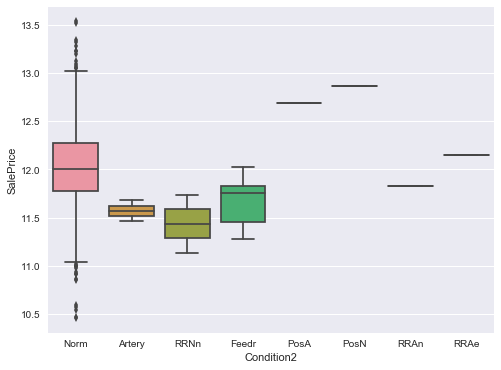

In [47]:
f, ax = plt.subplots(figsize=(8, 6))
fig = sb.boxplot(x="Condition2", y="SalePrice", data=HousesSold2)
plt.show()

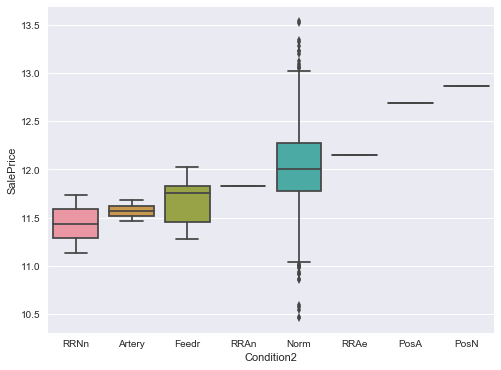

In [48]:
m = HousesSold2.groupby('Condition2')['SalePrice'].apply(np.median);

#print(m)
#print(sorted(m))

ordr = ['RRNn', 'Artery', 'Feedr', 'RRAn', 'Norm', 'RRAe', 'PosA', 'PosN'];
f, ax = plt.subplots(figsize=(8, 6))
fig = sb.boxplot(x="Condition2", y="SalePrice", order=ordr, data=HousesSold2)
plt.show()

In [49]:
Condition2Num = np.zeros(HousesSold2['Condition2'].shape)

for row in range(len(HousesSold2['Condition2'])):
    if HousesSold2['Condition2'].iloc[row] == 'RRNn':
        Condition2Num[row] = 0.0;
    elif HousesSold2['Condition2'].iloc[row] == 'Artery':
        Condition2Num[row] = 1.0;
    elif HousesSold2['Condition2'].iloc[row] == 'Feedr':
        Condition2Num[row] = 2.0;
    elif HousesSold2['Condition2'].iloc[row] == 'RRAn':
        Condition2Num[row] = 3.0;
    elif HousesSold2['Condition2'].iloc[row] == 'RRNe':
        Condition2Num[row] = 4.0;
    elif HousesSold2['Condition2'].iloc[row] == 'Norm':
        Condition2Num[row] = 5.0;
    elif HousesSold2['Condition2'].iloc[row] == 'RRAe':
        Condition2Num[row] = 6.0;
    elif HousesSold2['Condition2'].iloc[row] == 'PosA':
        Condition2Num[row] = 7.0;
    elif HousesSold2['Condition2'].iloc[row] == 'PosN':
        Condition2Num[row] = 8.0;
HousesSold2['Condition2Num'] = Condition2Num;

In [50]:
print(HousesSold2['Condition1Num'].describe())

count    1455.000000
mean        2.880412
std         0.905125
min         0.000000
25%         3.000000
50%         3.000000
75%         3.000000
max         8.000000
Name: Condition1Num, dtype: float64


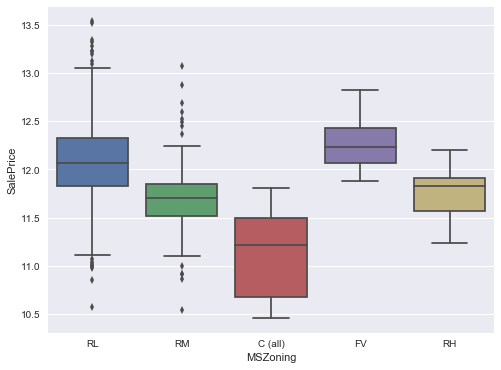

In [51]:
f, ax = plt.subplots(figsize=(8, 6))
fig = sb.boxplot(x="MSZoning", y="SalePrice", data=HousesSold2)
plt.show()

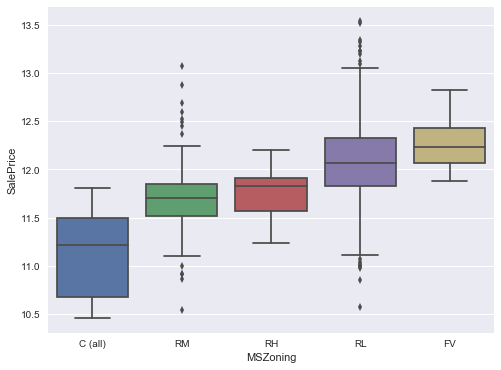

In [60]:
m = HousesSold2.groupby('MSZoning')['SalePrice'].apply(np.median);

#print(m)
#print(sorted(m))

ordr = ['C (all)', 'RM', 'RH', 'RL', 'FV'];
f, ax = plt.subplots(figsize=(8, 6))
fig = sb.boxplot(x="MSZoning", y="SalePrice", order=ordr, data=HousesSold2)
plt.show()

In [61]:
MSZoningNum = np.zeros(HousesSold2['MSZoning'].shape)

for row in range(len(HousesSold2['MSZoning'])):
    if HousesSold2['MSZoning'].iloc[row] == 'A':
        MSZoningNum[row] = 0.0;
    elif HousesSold2['MSZoning'].iloc[row] == 'C':
        MSZoningNum[row] = 0.0;
    elif HousesSold2['MSZoning'].iloc[row] == 'I':
        MSZoningNum[row] = 0.0;
    elif HousesSold2['MSZoning'].iloc[row] == 'RP':
        MSZoningNum[row] = 0.0;
    elif HousesSold2['MSZoning'].iloc[row] == 'RM':
        MSZoningNum[row] = 1.0;
    elif HousesSold2['MSZoning'].iloc[row] == 'RH':
        MSZoningNum[row] = 2.0;
    elif HousesSold2['MSZoning'].iloc[row] == 'RL':
        MSZoningNum[row] = 3.0;
    elif HousesSold2['MSZoning'].iloc[row] == 'FV':
        MSZoningNum[row] = 4.0;

HousesSold2['MSZoningNum'] = MSZoningNum;

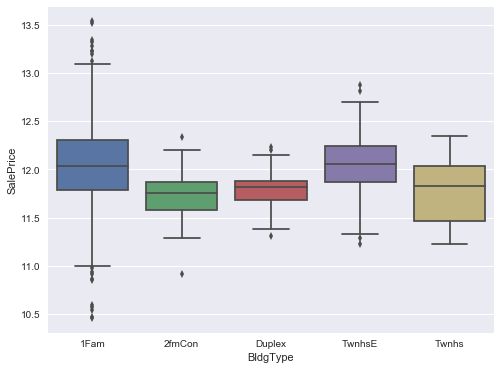

In [62]:
f, ax = plt.subplots(figsize=(8, 6))
fig = sb.boxplot(x="BldgType", y="SalePrice", data=HousesSold2)
plt.show()

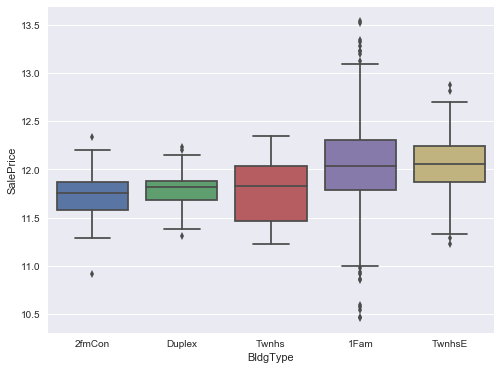

In [63]:
m = HousesSold2.groupby('BldgType')['SalePrice'].apply(np.median);

#print(m)
#print(sorted(m))

ordr = ['2fmCon', 'Duplex', 'Twnhs', '1Fam', 'TwnhsE'];
f, ax = plt.subplots(figsize=(8, 6))
fig = sb.boxplot(x="BldgType", y="SalePrice", order=ordr, data=HousesSold2)
plt.show()

In [64]:
BldgTypeNum = np.zeros(HousesSold2['BldgType'].shape)

for row in range(len(HousesSold2['BldgType'])):
    if HousesSold2['BldgType'].iloc[row] == '2fmCon':
        BldgTypeNum[row] = 0.0;
    elif HousesSold2['BldgType'].iloc[row] == 'Duplex':
        BldgTypeNum[row] = 1.0;
    elif HousesSold2['BldgType'].iloc[row] == 'Twnhs':
        BldgTypeNum[row] = 2.0;
    elif HousesSold2['BldgType'].iloc[row] == '1Fam':
        BldgTypeNum[row] = 3.0;
    elif HousesSold2['BldgType'].iloc[row] == 'TwnhsE':
        BldgTypeNum[row] = 4.0;


HousesSold2['BldgTypeNum'] = BldgTypeNum;

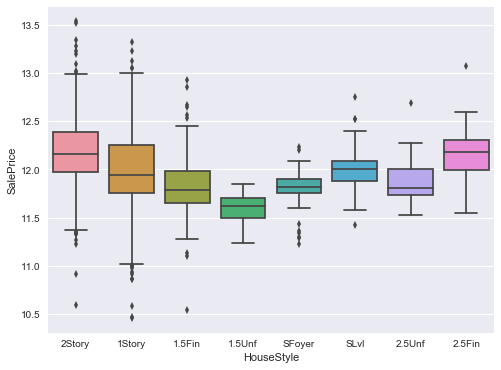

In [65]:
f, ax = plt.subplots(figsize=(8, 6))
fig = sb.boxplot(x="HouseStyle", y="SalePrice", data=HousesSold2)
plt.show()

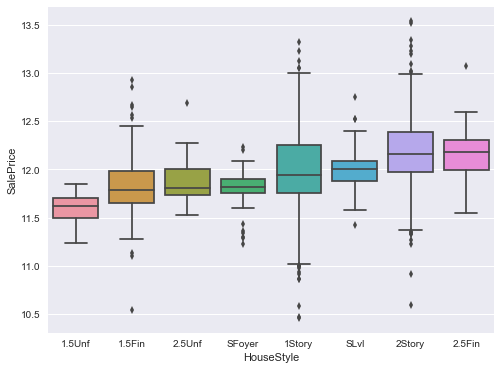

In [66]:
m = HousesSold2.groupby('HouseStyle')['SalePrice'].apply(np.median);

#print(m)
#print(sorted(m))

ordr = ['1.5Unf', '1.5Fin', '2.5Unf', 'SFoyer', '1Story', 'SLvl', '2Story', '2.5Fin'];
f, ax = plt.subplots(figsize=(8, 6))
fig = sb.boxplot(x="HouseStyle", y="SalePrice", order=ordr, data=HousesSold2)
plt.show()

In [67]:
HouseStyleNum = np.zeros(HousesSold2['HouseStyle'].shape)

for row in range(len(HousesSold2['HouseStyle'])):
    if HousesSold2['HouseStyle'].iloc[row] == '1.5Unf':
        HouseStyleNum[row] = 0.0;
    elif HousesSold2['HouseStyle'].iloc[row] == '1.5Fin':
        HouseStyleNum[row] = 1.0;
    elif HousesSold2['HouseStyle'].iloc[row] == '2.5Unf':
        HouseStyleNum[row] = 2.0;
    elif HousesSold2['HouseStyle'].iloc[row] == 'SFoyer':
        HouseStyleNum[row] = 3.0;
    elif HousesSold2['HouseStyle'].iloc[row] == '1Story':
        HouseStyleNum[row] = 4.0;
    elif HousesSold2['HouseStyle'].iloc[row] == 'SLvl':
        HouseStyleNum[row] = 5.0;
    elif HousesSold2['HouseStyle'].iloc[row] == '2Story':
        HouseStyleNum[row] = 6.0;
    elif HousesSold2['HouseStyle'].iloc[row] == '2.5Fin':
        HouseStyleNum[row] = 7.0;


HousesSold2['HouseStyleNum'] = HouseStyleNum;

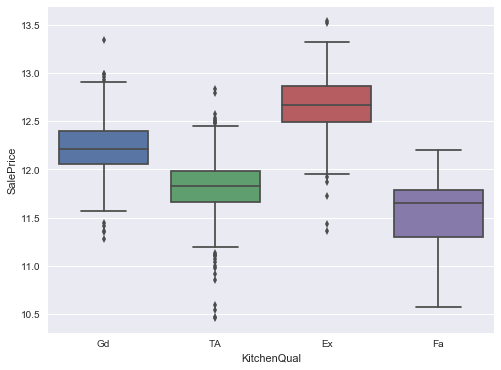

In [68]:
f, ax = plt.subplots(figsize=(8, 6))
fig = sb.boxplot(x="KitchenQual", y="SalePrice", data=HousesSold2)
plt.show()

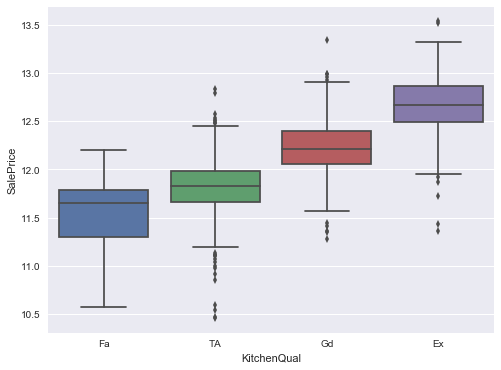

In [69]:
m = HousesSold2.groupby('KitchenQual')['SalePrice'].apply(np.median);

#print(m)
#print(sorted(m))

ordr = ['Fa', 'TA', 'Gd', 'Ex'];
f, ax = plt.subplots(figsize=(8, 6))
fig = sb.boxplot(x="KitchenQual", y="SalePrice", order=ordr, data=HousesSold2)
plt.show()

In [70]:
KitchenQualNum = np.zeros(HousesSold2['KitchenQual'].shape)

for row in range(len(HousesSold2['KitchenQual'])):
    if HousesSold2['KitchenQual'].iloc[row] == 'Po':
        KitchenQualNum[row] = 0.0;
    elif HousesSold2['KitchenQual'].iloc[row] == 'Fa':
        KitchenQualNum[row] = 1.0;
    elif HousesSold2['KitchenQual'].iloc[row] == 'TA':
        KitchenQualNum[row] = 2.0;
    elif HousesSold2['KitchenQual'].iloc[row] == 'Gd':
        KitchenQualNum[row] = 3.0;
    elif HousesSold2['KitchenQual'].iloc[row] == 'Ex':
        KitchenQualNum[row] = 4.0;


HousesSold2['KitchenQualNum'] = KitchenQualNum;

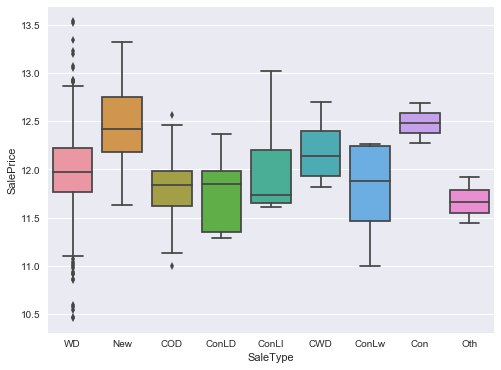

In [103]:
f, ax = plt.subplots(figsize=(8, 6))
fig = sb.boxplot(x="SaleType", y="SalePrice", data=HousesSold2)
plt.show()

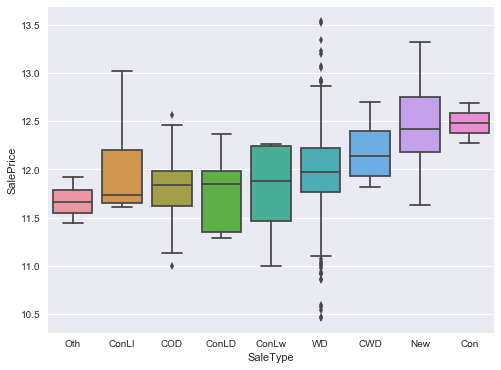

In [105]:
m = HousesSold2.groupby('SaleType')['SalePrice'].apply(np.median);

#print(m)
#print(sorted(m))

ordr = ['Oth', 'ConLI', 'COD', 'ConLD', 'ConLw', 'WD', 'CWD', 'New', 'Con'];
f, ax = plt.subplots(figsize=(8, 6))
fig = sb.boxplot(x="SaleType", y="SalePrice", order=ordr, data=HousesSold2)
plt.show()

In [106]:
SaleTypeNum = np.zeros(HousesSold2['SaleType'].shape)

for row in range(len(HousesSold2['SaleType'])):
    if HousesSold2['SaleType'].iloc[row] == 'Oth':
        SaleTypeNum[row] = 0.0;
    elif HousesSold2['SaleType'].iloc[row] == 'ConLI':
        SaleTypeNum[row] = 1.0;
    elif HousesSold2['SaleType'].iloc[row] == 'COD':
        SaleTypeNum[row] = 2.0;
    elif HousesSold2['SaleType'].iloc[row] == 'ConLD':
        SaleTypeNum[row] = 3.0;
    elif HousesSold2['SaleType'].iloc[row] == 'ConLw':
        SaleTypeNum[row] = 4.0;
    elif HousesSold2['SaleType'].iloc[row] == 'VWD':
        SaleTypeNum[row] = 5.0;
    elif HousesSold2['SaleType'].iloc[row] == 'WD':
        SaleTypeNum[row] = 6.0;
    elif HousesSold2['SaleType'].iloc[row] == 'CWD':
        SaleTypeNum[row] = 7.0;
    elif HousesSold2['SaleType'].iloc[row] == 'New':
        SaleTypeNum[row] = 8.0;
    elif HousesSold2['SaleType'].iloc[row] == 'Con':
        SaleTypeNum[row] = 9.0;


HousesSold2['SaleTypeNum'] = SaleTypeNum;

In [107]:
print(HousesSold2['GarageCars'].describe())
print(HousesSold2['1stFlrSF'].describe())
HousesSold2['YearBuilt1'] = np.power(HousesSold2['YearBuilt'],2)
print(HousesSold2['TotRmsAbvGrd'].describe())

count    1455.000000
mean        1.764948
std         0.747123
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         4.000000
Name: GarageCars, dtype: float64
count    1455.000000
mean        7.005049
std         0.313227
min         5.811141
25%         6.782192
50%         6.990257
75%         7.236699
max         7.971776
Name: 1stFlrSF, dtype: float64
count    1455.000000
mean        6.507904
std         1.614851
min         2.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        14.000000
Name: TotRmsAbvGrd, dtype: float64



# Final Model

The model, we propose to predict the *SalePrice* is:

$$\log SP = a OQ+ b \log GLA + c GC + d TB + e FB + f YB^2 + g YB + h + i YM + j SC + k ND + l CN1 + m CN2 + n GC + o \log FF + p TR + q MZ + r BT + s HS + t KQ + u ST$$


Here:
$a, b, c, d, e, f, g, h, i, j, k, l, m, n, o, p, q, r, s, t, u$ are unknown constants and

$SP$ = *SalePrice*

$OQ$ = *OverallQual*

and so on..

In [108]:
houses_X = HousesSold2[['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath',\
                        'YearBuilt1', 'YearBuilt', 'YearRemodAdd', 'MSSubClassNum', 'NeighborhoodNum',\
                        'Condition1Num', 'Condition2Num','GarageCars', '1stFlrSF', 'TotRmsAbvGrd',\
                       'MSZoningNum', "BldgTypeNum", 'HouseStyleNum', 'KitchenQualNum', 'SaleTypeNum']]

houses_y = HousesSold2['SalePrice']

In [109]:
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(houses_X, houses_y)

# The coefficients
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((regr.predict(houses_X) - houses_y) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.4f' % regr.score(houses_X, houses_y))

Intercept: 
 -117.327763284
Coefficients: 
 [  7.26375577e-02   4.00797922e-01   3.11075269e-02   1.62607278e-04
  -2.30602202e-02  -3.16166361e-05   1.23627313e-01   2.16155051e-03
   6.65136996e-03   8.31669596e-03   1.05605623e-02   6.27867120e-03
   3.11075269e-02   1.40786554e-02   2.13087231e-03   3.09543920e-02
   5.05169375e-03  -6.71019820e-03   4.94377312e-02   1.97117391e-02]
Mean squared error: 0.02
Variance score: 0.8810


In [110]:
HousesTest = pd.read_csv('test.csv');
print(HousesTest.shape)
print(HousesTest.columns)

(1459, 80)
Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 

In [111]:
print(HousesTest['OverallQual'].describe())

count    1459.000000
mean        6.078821
std         1.436812
min         1.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: OverallQual, dtype: float64


In [112]:
print(HousesTest['Neighborhood'].describe())

count      1459
unique       25
top       NAmes
freq        218
Name: Neighborhood, dtype: object


In [113]:
NeighborhoodNum1 = np.zeros(HousesTest['Neighborhood'].shape)

for row in range(len(HousesTest['Neighborhood'])):
    if HousesTest['Neighborhood'].iloc[row] == 'MeadowV':
        NeighborhoodNum1[row] = 0.0;
    elif HousesTest['Neighborhood'].iloc[row] == 'IDOTRR':
        NeighborhoodNum1[row] = 1.0;
    elif HousesTest['Neighborhood'].iloc[row] == 'BrDale':
        NeighborhoodNum1[row] = 2.0;
    elif HousesTest['Neighborhood'].iloc[row] == 'OldTown':
        NeighborhoodNum1[row] = 3.0;
    elif HousesTest['Neighborhood'].iloc[row] == 'Edwards':
        NeighborhoodNum1[row] = 4.0;
    elif HousesTest['Neighborhood'].iloc[row] == 'BrkSide':
        NeighborhoodNum1[row] = 5.0;
    elif HousesTest['Neighborhood'].iloc[row] == 'Sawyer':
        NeighborhoodNum1[row] = 6.0;
    elif HousesTest['Neighborhood'].iloc[row] == 'Blueste':
        NeighborhoodNum1[row] = 7.0;
    elif HousesTest['Neighborhood'].iloc[row] == 'SWISU':
        NeighborhoodNum1[row] = 8.0;
    elif HousesTest['Neighborhood'].iloc[row] == 'NAmes':
        NeighborhoodNum1[row] = 9.0;
    elif HousesTest['Neighborhood'].iloc[row] == 'NPkVill':
        NeighborhoodNum1[row] = 10.0;
    elif HousesTest['Neighborhood'].iloc[row] == 'Mitchel':
        NeighborhoodNum1[row] = 11.0;
    elif HousesTest['Neighborhood'].iloc[row] == 'SawyerW':
        NeighborhoodNum1[row] = 12.0;
    elif HousesTest['Neighborhood'].iloc[row] == 'Gilbert':
        NeighborhoodNum1[row] = 13.0;
    elif HousesTest['Neighborhood'].iloc[row] == 'NWAmes':
        NeighborhoodNum1[row] = 14.0;
    elif HousesTest['Neighborhood'].iloc[row] == 'Blmngtn':
        NeighborhoodNum1[row] = 15.0;
    elif HousesTest['Neighborhood'].iloc[row] == 'CollgCr':
        NeighborhoodNum1[row] = 16.0;
    elif HousesTest['Neighborhood'].iloc[row] == 'ClearCr':
        NeighborhoodNum1[row] = 17.0;
    elif HousesTest['Neighborhood'].iloc[row] == 'Crawfor':
        NeighborhoodNum1[row] = 18.0;
    elif HousesTest['Neighborhood'].iloc[row] == 'Veenker':
        NeighborhoodNum1[row] = 19.0;
    elif HousesTest['Neighborhood'].iloc[row] == 'Somerst':
        NeighborhoodNum1[row] = 20.0;
    elif HousesTest['Neighborhood'].iloc[row] == 'Timber':
        NeighborhoodNum1[row] = 21.0;
    elif HousesTest['Neighborhood'].iloc[row] == 'StoneBr':
        NeighborhoodNum1[row] = 21.0;
    elif HousesTest['Neighborhood'].iloc[row] == 'NoRidge':
        NeighborhoodNum1[row] = 22.0;
    elif HousesTest['Neighborhood'].iloc[row] == 'NridgHt':
        NeighborhoodNum1[row] = 23.0;
print(NeighborhoodNum1)
HousesTest['NeighborhoodNum'] = NeighborhoodNum1;

[  9.   9.  13. ...,  11.  11.  11.]


In [114]:
MSSubClassNum1 = np.zeros(HousesTest['MSSubClass'].shape)

for row in range(len(HousesTest['MSSubClass'])):
    if int(HousesTest['MSSubClass'].iloc[row]) == 180:
        MSSubClassNum1[row] = 0.0;
    elif int(HousesTest['MSSubClass'].iloc[row]) == 30:
        MSSubClassNum1[row] = 1.0;
    elif int(HousesTest['MSSubClass'].iloc[row]) == 45:
        MSSubClassNum1[row] = 2.0;
    elif int(HousesTest['MSSubClass'].iloc[row]) == 190:
        MSSubClassNum1[row] = 3.0;
    elif int(HousesTest['MSSubClass'].iloc[row]) == 50:
        MSSubClassNum1[row] = 4.0;
    elif int(HousesTest['MSSubClass'].iloc[row]) == 90:
        MSSubClassNum1[row] = 5.0;
    elif int(HousesTest['MSSubClass'].iloc[row]) == 85:
        MSSubClassNum1[row] = 6.0;
    elif int(HousesTest['MSSubClass'].iloc[row]) == 40:
        MSSubClassNum1[row] = 7.0;
    elif int(HousesTest['MSSubClass'].iloc[row]) == 160:
        MSSubClassNum1[row] = 8.0;
    elif int(HousesTest['MSSubClass'].iloc[row]) == 70:
        MSSubClassNum1[row] = 9.0;
    elif int(HousesTest['MSSubClass'].iloc[row]) == 20:
        MSSubClassNum1[row] = 10.0;
    elif int(HousesTest['MSSubClass'].iloc[row]) == 75:
        MSSubClassNum1[row] = 11.0;
    elif int(HousesTest['MSSubClass'].iloc[row]) == 80:
        MSSubClassNum1[row] = 12.0;
    elif int(HousesTest['MSSubClass'].iloc[row]) == 120:
        MSSubClassNum1[row] = 13.0;
    elif int(HousesTest['MSSubClass'].iloc[row]) == 60:
        MSSubClassNum1[row] = 14.0;
HousesTest['MSSubClassNum'] = MSSubClassNum1;

In [115]:
print(HousesTest['MSSubClassNum'].describe())

count    1459.000000
mean        9.370802
std         3.766176
min         0.000000
25%         8.000000
50%        10.000000
75%        13.000000
max        14.000000
Name: MSSubClassNum, dtype: float64


In [116]:
HousesTest['GrLivArea'] = np.log(HousesTest['GrLivArea'])
print(HousesTest['GrLivArea'].describe())

count    1459.000000
mean        7.253745
std         0.316152
min         6.008813
25%         7.018849
50%         7.266827
75%         7.450661
max         8.536015
Name: GrLivArea, dtype: float64


In [117]:
print(HousesTest['GarageCars'].describe())

count    1458.000000
mean        1.766118
std         0.775945
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         5.000000
Name: GarageCars, dtype: float64


One value is missing, ,most probably this is a home with no garage. We can, therefore, replace that with a zero.

In [118]:
HousesTest['GarageCars'].fillna(0, inplace=True)

In [119]:
print(HousesTest['TotalBsmtSF'].describe())

count    1458.000000
mean     1046.117970
std       442.898624
min         0.000000
25%       784.000000
50%       988.000000
75%      1305.000000
max      5095.000000
Name: TotalBsmtSF, dtype: float64


Again there is a missing value, we can replace this with zero as well.

In [120]:
HousesTest['TotalBsmtSF'].fillna(0, inplace=True)

In [121]:
print(HousesTest['FullBath'].describe())

count    1459.000000
mean        1.570939
std         0.555190
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         4.000000
Name: FullBath, dtype: float64


In [122]:
print(HousesTest['YearBuilt'].describe())

count    1459.000000
mean     1971.357779
std        30.390071
min      1879.000000
25%      1953.000000
50%      1973.000000
75%      2001.000000
max      2010.000000
Name: YearBuilt, dtype: float64


In [123]:
print(HousesTest['YearRemodAdd'].describe())

count    1459.000000
mean     1983.662783
std        21.130467
min      1950.000000
25%      1963.000000
50%      1992.000000
75%      2004.000000
max      2010.000000
Name: YearRemodAdd, dtype: float64


In [124]:
print(HousesTest['GarageCars'].describe())

count    1459.000000
mean        1.764907
std         0.777056
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         5.000000
Name: GarageCars, dtype: float64


In [125]:
HousesTest['1stFlrSF'] = np.log(HousesTest['1stFlrSF']);
print(HousesTest['1stFlrSF'].describe())

count    1459.000000
mean        6.998954
std         0.328155
min         6.008813
25%         6.772508
50%         6.983790
75%         7.231649
max         8.536015
Name: 1stFlrSF, dtype: float64


In [126]:
print(HousesTest['TotRmsAbvGrd'].describe())

count    1459.000000
mean        6.385195
std         1.508895
min         3.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        15.000000
Name: TotRmsAbvGrd, dtype: float64


In [127]:
Condition1Num = np.zeros(HousesTest['Condition1'].shape)


for row in range(len(HousesTest['Condition1'])):
    if HousesTest['Condition1'].iloc[row] == 'Artery':
        Condition1Num[row] = 0.0;
    elif HousesTest['Condition1'].iloc[row] == 'Feedr':
        Condition1Num[row] = 1.0;
    elif HousesTest['Condition1'].iloc[row] == 'RRAe':
        Condition1Num[row] = 2.0;
    elif HousesTest['Condition1'].iloc[row] == 'Norm':
        Condition1Num[row] = 3.0;
    elif HousesTest['Condition1'].iloc[row] == 'RRAn':
        Condition1Num[row] = 4.0;
    elif HousesTest['Condition1'].iloc[row] == 'RRNe':
        Condition1Num[row] = 5.0;
    elif HousesTest['Condition1'].iloc[row] == 'PosN':
        Condition1Num[row] = 6.0;
    elif HousesTest['Condition1'].iloc[row] == 'PosA':
        Condition1Num[row] = 7.0;
    elif HousesTest['Condition1'].iloc[row] == 'RRNn':
        Condition1Num[row] = 8.0;
HousesTest['Condition1Num'] = Condition1Num;

In [128]:
Condition2Num = np.zeros(HousesTest['Condition2'].shape)

for row in range(len(HousesTest['Condition2'])):
    if HousesTest['Condition2'].iloc[row] == 'RRNn':
        Condition2Num[row] = 0.0;
    elif HousesTest['Condition2'].iloc[row] == 'Artery':
        Condition2Num[row] = 1.0;
    elif HousesTest['Condition2'].iloc[row] == 'Feedr':
        Condition2Num[row] = 2.0;
    elif HousesTest['Condition2'].iloc[row] == 'RRAn':
        Condition2Num[row] = 3.0;
    elif HousesTest['Condition2'].iloc[row] == 'RRNe':
        Condition2Num[row] = 4.0;
    elif HousesTest['Condition2'].iloc[row] == 'Norm':
        Condition2Num[row] = 5.0;
    elif HousesTest['Condition2'].iloc[row] == 'RRAe':
        Condition2Num[row] = 6.0;
    elif HousesTest['Condition2'].iloc[row] == 'PosA':
        Condition2Num[row] = 7.0;
    elif HousesTest['Condition2'].iloc[row] == 'PosN':
        Condition2Num[row] = 8.0;
HousesTest['Condition2Num'] = Condition2Num;

In [129]:
HousesTest['YearBuilt1'] = np.power(HousesTest['YearBuilt'], 2)

In [130]:
MSZoningNum = np.zeros(HousesTest['MSZoning'].shape)

for row in range(len(HousesTest['MSZoning'])):
    if HousesTest['MSZoning'].iloc[row] == 'A':
        MSZoningNum[row] = 0.0;
    elif HousesTest['MSZoning'].iloc[row] == 'C':
        MSZoningNum[row] = 0.0;
    elif HousesTest['MSZoning'].iloc[row] == 'I':
        MSZoningNum[row] = 0.0;
    elif HousesTest['MSZoning'].iloc[row] == 'RP':
        MSZoningNum[row] = 0.0;
    elif HousesTest['MSZoning'].iloc[row] == 'RM':
        MSZoningNum[row] = 1.0;
    elif HousesTest['MSZoning'].iloc[row] == 'RH':
        MSZoningNum[row] = 2.0;
    elif HousesTest['MSZoning'].iloc[row] == 'RL':
        MSZoningNum[row] = 3.0;
    elif HousesTest['MSZoning'].iloc[row] == 'FV':
        MSZoningNum[row] = 4.0;

HousesTest['MSZoningNum'] = MSZoningNum;

In [131]:
BldgTypeNum = np.zeros(HousesTest['BldgType'].shape)

for row in range(len(HousesTest['BldgType'])):
    if HousesTest['BldgType'].iloc[row] == '2fmCon':
        BldgTypeNum[row] = 0.0;
    elif HousesTest['BldgType'].iloc[row] == 'Duplex':
        BldgTypeNum[row] = 1.0;
    elif HousesTest['BldgType'].iloc[row] == 'Twnhs':
        BldgTypeNum[row] = 2.0;
    elif HousesTest['BldgType'].iloc[row] == '1Fam':
        BldgTypeNum[row] = 3.0;
    elif HousesTest['BldgType'].iloc[row] == 'TwnhsE':
        BldgTypeNum[row] = 4.0;


HousesTest['BldgTypeNum'] = BldgTypeNum;

In [132]:
HouseStyleNum = np.zeros(HousesTest['HouseStyle'].shape)

for row in range(len(HousesTest['HouseStyle'])):
    if HousesTest['HouseStyle'].iloc[row] == '1.5Unf':
        HouseStyleNum[row] = 0.0;
    elif HousesTest['HouseStyle'].iloc[row] == '1.5Fin':
        HouseStyleNum[row] = 1.0;
    elif HousesTest['HouseStyle'].iloc[row] == '2.5Unf':
        HouseStyleNum[row] = 2.0;
    elif HousesTest['HouseStyle'].iloc[row] == 'SFoyer':
        HouseStyleNum[row] = 3.0;
    elif HousesTest['HouseStyle'].iloc[row] == '1Story':
        HouseStyleNum[row] = 4.0;
    elif HousesTest['HouseStyle'].iloc[row] == 'SLvl':
        HouseStyleNum[row] = 5.0;
    elif HousesTest['HouseStyle'].iloc[row] == '2Story':
        HouseStyleNum[row] = 6.0;
    elif HousesTest['HouseStyle'].iloc[row] == '2.5Fin':
        HouseStyleNum[row] = 7.0;


HousesTest['HouseStyleNum'] = HouseStyleNum;

In [133]:
KitchenQualNum = np.zeros(HousesTest['KitchenQual'].shape)

for row in range(len(HousesTest['KitchenQual'])):
    if HousesTest['KitchenQual'].iloc[row] == 'Po':
        KitchenQualNum[row] = 0.0;
    elif HousesTest['KitchenQual'].iloc[row] == 'Fa':
        KitchenQualNum[row] = 1.0;
    elif HousesTest['KitchenQual'].iloc[row] == 'TA':
        KitchenQualNum[row] = 2.0;
    elif HousesTest['KitchenQual'].iloc[row] == 'Gd':
        KitchenQualNum[row] = 3.0;
    elif HousesTest['KitchenQual'].iloc[row] == 'Ex':
        KitchenQualNum[row] = 4.0;


HousesTest['KitchenQualNum'] = KitchenQualNum;

In [134]:
SaleTypeNum = np.zeros(HousesTest['SaleType'].shape)

for row in range(len(HousesTest['SaleType'])):
    if HousesTest['SaleType'].iloc[row] == 'Oth':
        SaleTypeNum[row] = 0.0;
    elif HousesTest['SaleType'].iloc[row] == 'ConLI':
        SaleTypeNum[row] = 1.0;
    elif HousesTest['SaleType'].iloc[row] == 'COD':
        SaleTypeNum[row] = 2.0;
    elif HousesTest['SaleType'].iloc[row] == 'ConLD':
        SaleTypeNum[row] = 3.0;
    elif HousesTest['SaleType'].iloc[row] == 'ConLw':
        SaleTypeNum[row] = 4.0;
    elif HousesTest['SaleType'].iloc[row] == 'VWD':
        SaleTypeNum[row] = 5.0;
    elif HousesTest['SaleType'].iloc[row] == 'WD':
        SaleTypeNum[row] = 6.0;
    elif HousesTest['SaleType'].iloc[row] == 'CWD':
        SaleTypeNum[row] = 7.0;
    elif HousesTest['SaleType'].iloc[row] == 'New':
        SaleTypeNum[row] = 8.0;
    elif HousesTest['SaleType'].iloc[row] == 'Con':
        SaleTypeNum[row] = 9.0;


HousesTest['SaleTypeNum'] = SaleTypeNum;

In [135]:
houses_X1 = HousesTest[['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath',\
                        'YearBuilt1', 'YearBuilt', 'YearRemodAdd', 'MSSubClassNum', 'NeighborhoodNum',\
                        'Condition1Num', 'Condition2Num','GarageCars', '1stFlrSF', 'TotRmsAbvGrd',\
                       'MSZoningNum', 'BldgTypeNum', 'HouseStyleNum', "KitchenQualNum", 'SaleTypeNum']]
y_predTest = regr.predict(houses_X1)

In [136]:
y_predTestReal = np.exp(y_predTest);
resHousesPrice = pd.DataFrame({'Id':HousesTest['Id'], 'SalePrice':y_predTestReal});

In [137]:
resHousesPrice.to_csv('HousePricesV8.csv', sep=',', index=False)

In [32]:
df1 = HousesSold[HousesSold.MSSubClass==50]
df1.shape

(144, 81)

In [28]:
HousesSold["MSSubClass"].value_counts()

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

In [33]:
df2 = HousesSold[HousesSold.MSSubClass==120]
df2.shape

(87, 81)

In [34]:
df3 = HousesSold[HousesSold.MSSubClass==30]
df3.shape

(69, 81)

In [35]:
df4 = HousesSold[HousesSold.MSSubClass==160]
df4.shape

(63, 81)

In [36]:
df5 = HousesSold[HousesSold.MSSubClass==70]
df5.shape

(60, 81)

In [37]:
df6 = HousesSold[HousesSold.MSSubClass==80]
df6.shape

(58, 81)

In [38]:
df7 = HousesSold[HousesSold.MSSubClass==90]
df7.shape

(52, 81)

In [39]:
df8 = HousesSold[HousesSold.MSSubClass==190]
df8.shape

(30, 81)

In [41]:
df11=df1[["GrLivArea", "GarageArea", "SalePrice"]]

In [43]:
np.savetxt(r'np.txt', df11.values, fmt='%d')

In [44]:
df11.to_csv('np.csv', index=False)

In [45]:
df22=df2[["GrLivArea", "GarageArea", "SalePrice"]]
df22.to_csv('OneStoryPUD.csv', index=False)

In [46]:
df33=df3[["GrLivArea", "GarageArea", "SalePrice"]]
df33.to_csv('OneStory45AndOlder.csv', index=False)

In [47]:
df44=df4[["GrLivArea", "GarageArea", "SalePrice"]]
df44.to_csv('TwoStoryPUDN.csv', index=False)

In [48]:
df55=df5[["GrLivArea", "GarageArea", "SalePrice"]]
df55.to_csv('TwoStoryOlder.csv', index=False)

In [49]:
df66=df6[["GrLivArea", "GarageArea", "SalePrice"]]
df66.to_csv('SplitORMultilevel.csv', index=False)

In [50]:
df77=df7[["GrLivArea", "GarageArea", "SalePrice"]]
df77.to_csv('DuplexAllStylesAges.csv', index=False)

In [51]:
df88=df8[["GrLivArea", "GarageArea", "SalePrice"]]
df88.to_csv('TwoFamilyConAllStylesAges.csv', index=False)